# Zipf & Heap's laws verification
## Functions , Global vars & Config

In [77]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import re
import nltk
import io
from sklearn.metrics import r2_score
from nltk.corpus import stopwords

#This global variable controls the use of stopwords, when turned to false will ignore from all the indexes the 40 most popular stopwords in the english language, such as: the, of , a, ...
ALLOW_STOPWORDS = True
nltk.download("stopwords")
english_stopwords = set(stopwords.words("english"))
np.set_printoptions(suppress=True)

def zipf_function(rank,a, b, c):
    return c/np.power(rank+b,a)

def heap_function(n,k,b):
    return k * (np.power(n,b))


#Given a function and its domain/images give a set of coefficients for constants that fit the function the best
def find_curve_fit_values(function, x_values,y_frequencies, initial_hypotheses):

    coefficients, covariances = curve_fit(function, x_values,y_frequencies, p0=initial_hypotheses,maxfev=5000)
    return np.array(coefficients)

[nltk_data] Downloading package stopwords to /home/walter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
print(english_stopwords)

{'during', 'the', 'once', 'any', 'into', 'they', 'have', "aren't", 'where', 'yours', 'mightn', 'himself', 'should', "didn't", 'hadn', 'has', 'only', 'been', "that'll", 'yourself', "haven't", 'themselves', 'of', "it's", "doesn't", "isn't", "mightn't", "won't", 'their', 'and', 'o', 'mustn', 'against', 'nor', "should've", 'm', "she's", 'who', 'he', 'ain', 'both', 'do', 'all', 't', "needn't", 'haven', 'over', 'our', 'those', 'these', "shan't", 'hers', "wasn't", 'before', 'ours', 'up', 'just', 'here', 'that', 'were', 'an', 'under', 'below', 'his', 'which', 'but', 'there', 'out', 'how', 'to', 'theirs', 'herself', 'as', 'or', 'was', 'than', 'we', 'then', 'having', 'about', 'aren', 'she', 'me', 'myself', 'i', 'until', 'from', 'didn', 'very', 'are', 'what', 'be', 'its', 'am', "hasn't", "you'll", 'is', 'at', 'too', 'in', 'same', 'being', 'her', 'each', 'shan', 'by', 'you', 'doesn', 'on', 'further', 'wouldn', 'yourselves', "wouldn't", 'whom', 'shouldn', 'such', 'other', 'had', 'if', 'won', 'most'

## Input Processing & Data Cleansing

In [79]:
#This regex is a over-simplification of the english language, only accepts characters , hyphens (-) and aphostrophes (') and a single word can multiple of them, not just one , words like
# fo'c's'le or shouldn't've or un-re-elected politician. So to avoid treating will all the possible cases and exceptions and due to shortage of time, this simplification will be good enough
def word_belong_to_english(word: str):
    simplified_english_regex = r"^[a-zA-Z-']+$"
    return bool(re.fullmatch(simplified_english_regex, word))

csv_regex = r"(\d+)\s*,\s*(.*)"
novels_subindexes_counts = ["index_count1.txt","index_count2.txt", "index_count3.txt", "index_count4.txt", "index_count5.txt",
                            "index_count6.txt", "index_count7.txt", "index_count8.txt", "index_count9.txt", "index_count10.txt"]

#HEAP
def get_unique_words_and_total_words_for_each_subindex(subindexes):
    
    number_of_total_words = []
    number_of_unique_words = []
    
    for index in subindexes:
        n_words = 0
        n_uniques = 0
        for line in reversed(open(f"./files/novelsExperiment/{index}").readlines()):
            line = line.strip()
            matches = re.match(csv_regex, line)
            word = str(matches.group(2))
            frequency = float(matches.group(1))
            if not word_belong_to_english(word) or (not ALLOW_STOPWORDS and (word in english_stopwords)): 
                pass
            else:
                n_words += frequency
                n_uniques += 1

                
        number_of_total_words.append(n_words)
        number_of_unique_words.append(n_uniques)
    return number_of_total_words, number_of_unique_words
    

#ZIPF
# I've made a path to a folder named files, feel free to change for experimentation purposes
def get_words_and_frequencies_and_ranks_of_txt(path, name): 
    words = []
    frequencies = []
    n_total_words = []
    n_unique_words = []
    number_of_words = 0
    number_of_unique_words = 0
    invalid_words = 0

    for line in reversed(open(path).readlines()):
        line = line.strip()
        matches = re.match(csv_regex, line)
        word = str(matches.group(2))
        frequency = int(matches.group(1))
        
        #otherwise ignore the word, obviously all the stopwords are recognized by the simplified english regex
        if not word_belong_to_english(word) or (not ALLOW_STOPWORDS and (word in english_stopwords)): 
            invalid_words += 1
            pass
        else:
            words.append(word)
            frequencies.append(frequency)
            number_of_words += frequency 
            number_of_unique_words += 1
            n_total_words.append(number_of_words)
            n_unique_words.append(number_of_unique_words)
            
        
    print(invalid_words)
    return [np.arange(len(words))+1, np.array(frequencies), np.array(words), np.array(n_unique_words), np.array(n_total_words), name]

arxiv_information = get_words_and_frequencies_and_ranks_of_txt("./files/arxivIndex.txt", "Arxiv")
news_information = get_words_and_frequencies_and_ranks_of_txt("./files/newsIndex.txt", "News")
novels_information = get_words_and_frequencies_and_ranks_of_txt("./files/novelsIndex.txt", "Novels")

x_heap , y_heap = get_unique_words_and_total_words_for_each_subindex(novels_subindexes_counts)

#what about preprocessing?????

#Index information is a pseudo-structure which contains ranks, frequencies, words, total_words, unique_words, indexes names,zipf_estimations, heapf_estimations
index_information = [arxiv_information, news_information, novels_information]



32132
39724
6051


In [80]:
#How many words
print(arxiv_information[1][0])
print(news_information[1][0])
print(novels_information[1][0])
print("----------------------")
print(x_heap)
print(y_heap)

1077659
257240
206546
----------------------
[3634.0, 38619.0, 114316.0, 202729.0, 357767.0, 626380.0, 1690780.0, 1778455.0, 2404835.0, 2908860.0]
[847, 5918, 10370, 12801, 19811, 30843, 37751, 39947, 51427, 55773]


## Plotting function

In [81]:
def plot_both_scales(x, y, y_estimations, index_name, law):
    #make 2 subplots and get fig and axes for both plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

    # Plot on the first subplot (linear scale)
    ax1.plot(x, y, label="Real Frequencies")
    ax1.plot(x, y_estimations, label=f"{law} Estimation")
    ax1.set_title(f"Word Frequency for {index_name}")
    ax1.set_xlabel("Word Ranking")
    ax1.set_ylabel("Frequencies")
    ax1.legend()

    # Plot on the second subplot (log-log scale)
    ax2.plot(np.log(x), np.log(y), label="Real Frequencies")
    ax2.plot(np.log(x), np.log(y_estimations), label=f"{law} Estimation")
    ax2.set_title(f"Word Frequency for {index_name}. Log-Log Scale")
    ax2.set_xlabel("Log Word Ranking")
    ax2.set_ylabel("Log Frequencies")
    ax2.legend()

    # Show the subplots
    plt.show()

## Computing Coefficients & Estimating Values

In [82]:
#for each index, there's a row representing the 3 parameters a,b,c

def compute_zipf_estimated_values(ranks,a, b,c):
  return [zipf_function(rank,a, b,c) for rank in ranks]
  
#lets use as initial hypothesis that a=1, b = 0 and c = "maxium frequency of that index"
coefficient_matrix = np.array([
                                find_curve_fit_values(zipf_function, arxiv_information[0], arxiv_information[1], [1,0, arxiv_information[1][0]]),   #arxiv
                                find_curve_fit_values(zipf_function, news_information[0], news_information[1], [1,0, news_information[1][0]]),     #news
                                find_curve_fit_values(zipf_function, novels_information[0], novels_information[1], [1,0, novels_information[1][0]])  #novels
                              ])

zipf_estimation_arxiv = compute_zipf_estimated_values(arxiv_information[0], *coefficient_matrix[0])
index_information[0].append(zipf_estimation_arxiv)
zipf_estimation_news = compute_zipf_estimated_values(news_information[0], *coefficient_matrix[1])
index_information[1].append(zipf_estimation_news)
zipf_estimation_novels = compute_zipf_estimated_values(novels_information[0], *coefficient_matrix[2])
index_information[2].append(zipf_estimation_novels)




In [83]:
print(coefficient_matrix)

[[      1.04301528       0.59666913 1745153.51980028]
 [      0.98453754       1.28255265  541407.33866827]
 [      1.00700603       0.80505127  368405.24502511]]


## Zipf law check

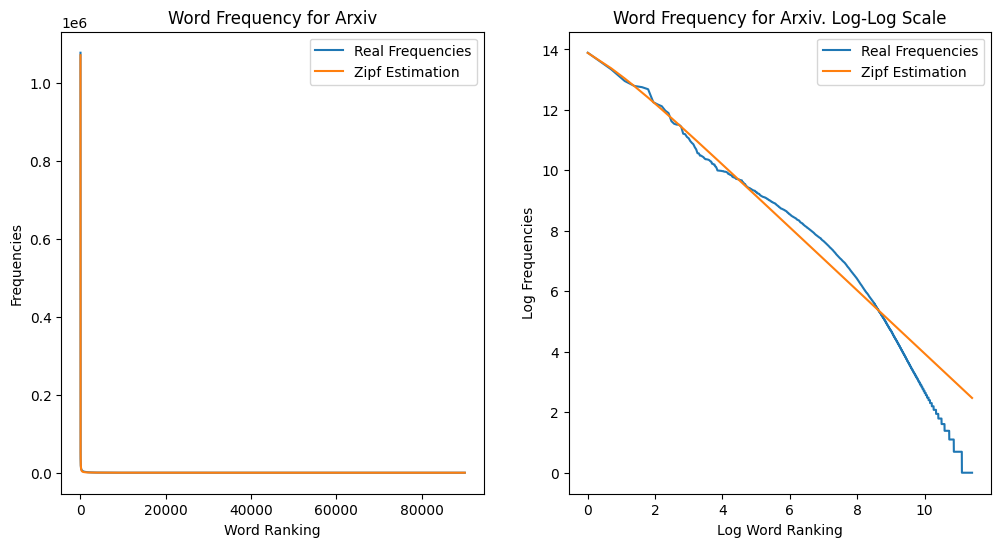

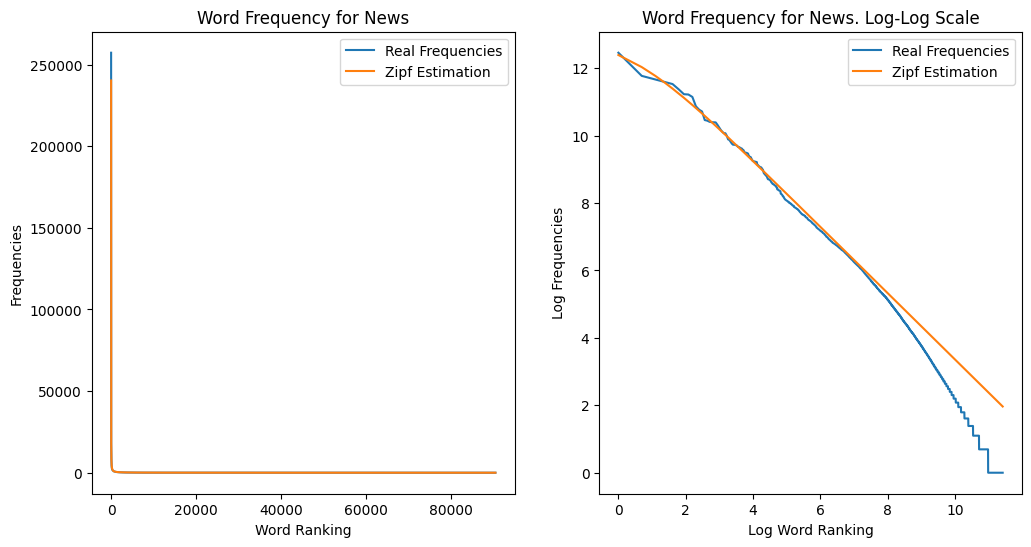

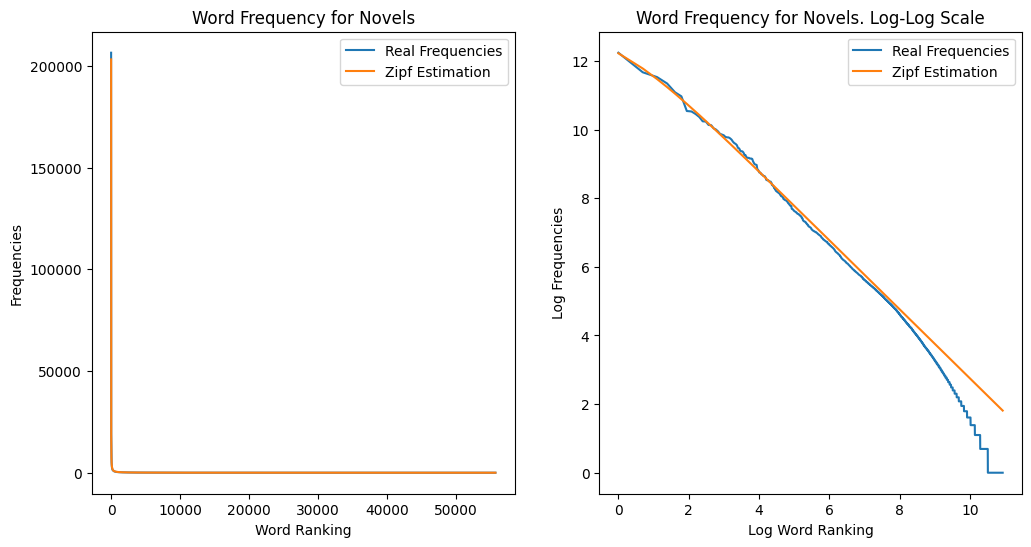

In [84]:

for idx, information in enumerate(index_information):
    plot_both_scales(
        x=information[0],
        y=information[1],
        y_estimations=information[6],
        index_name=information[5],
        law="Zipf"
        )

## Heap's Law Check

A reversal on the information should be done (sorting the frequencies descendingly) in order to have a nice looking heaps ascending curve. This can be done using reversed

In [85]:
heap_coefficients = find_curve_fit_values(heap_function, x_heap, y_heap, [50, 0.5])
print(heap_coefficients)


[33.21474324  0.49739537]


In [86]:
def compute_heap_estimated_values(N,k, b):
  return [heap_function(n,k,b) for n in N]

y_heap_estimated = compute_heap_estimated_values(x_heap, heap_coefficients[0], heap_coefficients[1])

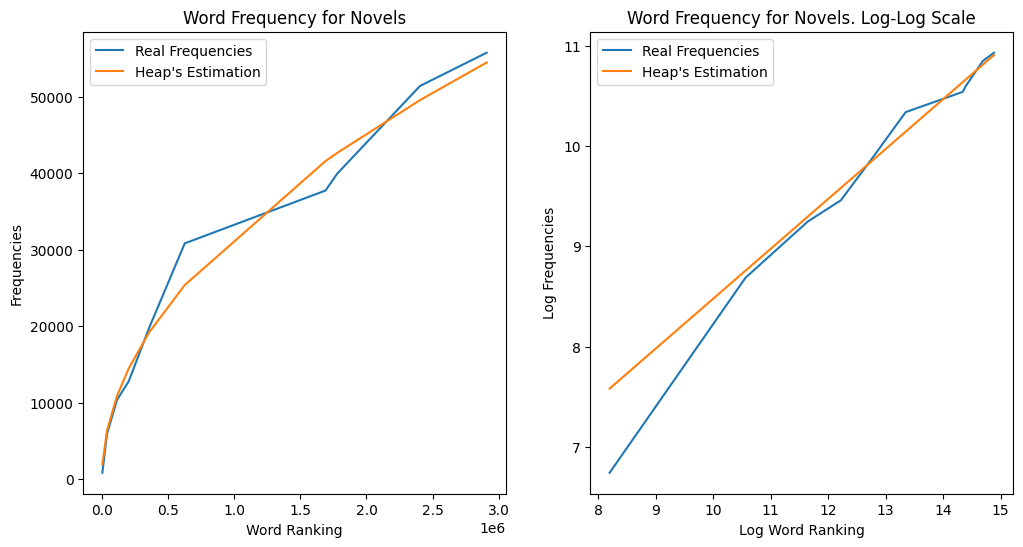

In [87]:
plot_both_scales(
    x=x_heap,
    y=y_heap,
    y_estimations=y_heap_estimated,
    index_name="Novels",
    law="Heap's"
)